In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
import cv2
from glob import glob

In [3]:
fpath = glob ('./Cropped Data/female/*.jpg')
mpath = glob ('./Cropped Data/male/*.jpg')

In [4]:
df_female = pd.DataFrame(fpath,columns=['filename'])
df_female['gender'] = 'female'
df_male = pd.DataFrame(mpath,columns=['filename'])
df_male['gender'] = 'male'

In [5]:
df = pd.concat((df_female,df_male),axis=0)

In [6]:
df.shape

(5020, 2)

In [7]:
def get_size(path):
    img = cv2.imread(path)
    return img.shape[0]

In [8]:
df['dimension'] = df['filename'].apply(get_size)
df

,filename,gender,dimension
0,./Cropped Data/female\female_0.jpg,female,273
1,./Cropped Data/female\female_1.jpg,female,182
2,./Cropped Data/female\female_100.jpg,female,122
3,./Cropped Data/female\female_1002.jpg,female,122
4,./Cropped Data/female\female_1005.jpg,female,182
...,...,...,...
2311,./Cropped Data/male\male_994.jpg,male,122
2312,./Cropped Data/male\male_996.jpg,male,54
2313,./Cropped Data/male\male_997.jpg,male,122
2314,./Cropped Data/male\male_998.jpg,male,81


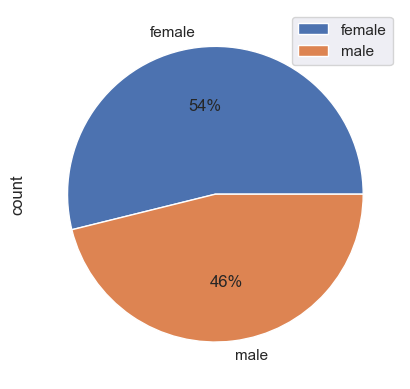

In [10]:
df['gender'].value_counts().plot(kind='pie',autopct='%0.0f%%')
plt.legend()
plt.show()

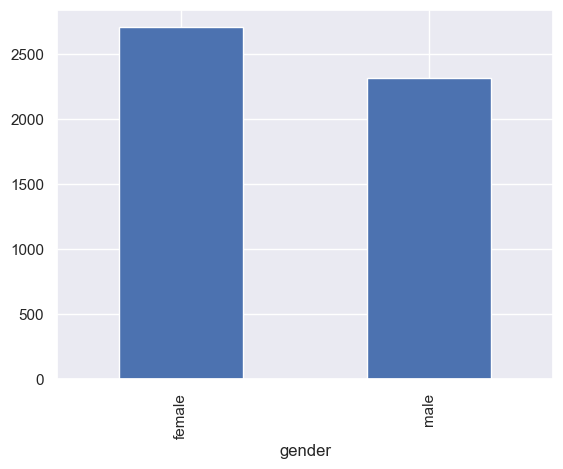

In [11]:
df['gender'].value_counts().plot(kind='bar')
plt.show()

[]

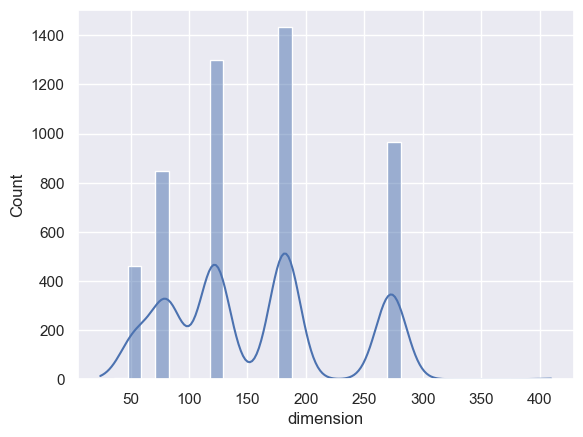

In [12]:
sns.histplot(data = df['dimension'],kde=True)
plt.plot()

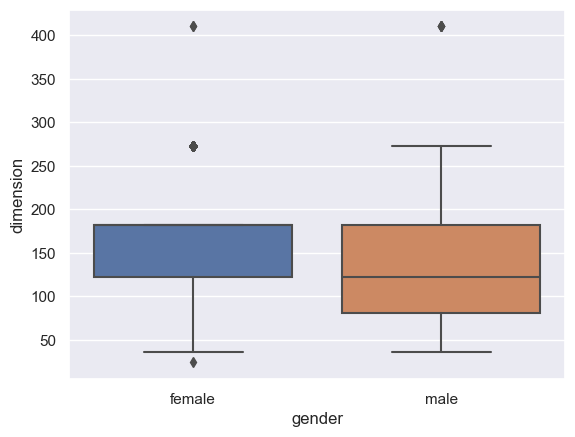

In [13]:
sns.boxplot(data = df,x = 'gender',y = 'dimension')
plt.show()

In [ ]:
#df = sns.load_dataset('tips')

In [ ]:
#df.head()

In [ ]:
#sns.boxplot(data = df['tip'])
#plt.show()

In [14]:
df=df.query('dimension>60')
df.shape

(4552, 3)

In [ ]:
#df.drop(['data'],axis = 1,inplace=True)

In [15]:
df['gender'].value_counts(normalize=True)

gender
female    0.543717
male      0.456283
Name: proportion, dtype: float64

In [21]:
def structuring(path):
    
    img = cv2.imread(path)

    gray =  cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        #RESIZING IMAGE
    size = gray.shape[0]
    if size >=100:
        gray_resize = cv2.resize(gray,(100,100),cv2.INTER_AREA)
    else:
        gray_resize = cv2.resize(gray,(100,100),cv2.INTER_CUBIC)

    #Flatten
    flatten_image = gray_resize.flatten()
    return flatten_image
        
    

In [22]:
df['data'] = df['filename'].apply(structuring)

C:\Users\91881\AppData\Local\Temp\ipykernel_12048\2635485595.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['data'] = df['filename'].apply(structuring)


In [23]:
df

,filename,gender,dimension,data
0,./Cropped Data/female\female_0.jpg,female,273,"[188, 182, 182, 185, 174, 181, 192, 180, 217, ..."
1,./Cropped Data/female\female_1.jpg,female,182,"[32, 23, 31, 27, 28, 30, 28, 33, 36, 30, 46, 8..."
2,./Cropped Data/female\female_100.jpg,female,122,"[49, 49, 35, 34, 42, 40, 35, 39, 71, 62, 46, 4..."
3,./Cropped Data/female\female_1002.jpg,female,122,"[132, 121, 118, 97, 85, 92, 91, 110, 155, 162,..."
4,./Cropped Data/female\female_1005.jpg,female,182,"[234, 234, 234, 228, 231, 205, 122, 98, 74, 54..."
...,...,...,...,...
2309,./Cropped Data/male\male_991.jpg,male,273,"[68, 86, 66, 59, 105, 92, 98, 82, 78, 161, 116..."
2311,./Cropped Data/male\male_994.jpg,male,122,"[17, 17, 16, 17, 17, 17, 18, 18, 18, 15, 13, 1..."
2313,./Cropped Data/male\male_997.jpg,male,122,"[179, 180, 180, 181, 182, 183, 181, 180, 181, ..."
2314,./Cropped Data/male\male_998.jpg,male,81,"[38, 37, 37, 38, 39, 40, 39, 38, 38, 38, 37, 3..."


In [24]:
data = df['data'].apply(pd.Series)

In [25]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,188,182,182,185,174,181,192,180,217,218,...,109,111,115,116,122,116,120,119,117,110
1,32,23,31,27,28,30,28,33,36,30,...,58,47,27,34,22,27,23,37,63,18
2,49,49,35,34,42,40,35,39,71,62,...,210,230,231,237,238,230,220,212,210,208
3,132,121,118,97,85,92,91,110,155,162,...,161,111,62,62,66,81,90,100,108,113
4,234,234,234,228,231,205,122,98,74,54,...,243,243,237,237,239,237,236,241,238,240


In [26]:
data.columns = [f"pixel_{i}" for i in data.columns]

In [27]:
data

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_9990,pixel_9991,pixel_9992,pixel_9993,pixel_9994,pixel_9995,pixel_9996,pixel_9997,pixel_9998,pixel_9999
0,188,182,182,185,174,181,192,180,217,218,...,109,111,115,116,122,116,120,119,117,110
1,32,23,31,27,28,30,28,33,36,30,...,58,47,27,34,22,27,23,37,63,18
2,49,49,35,34,42,40,35,39,71,62,...,210,230,231,237,238,230,220,212,210,208
3,132,121,118,97,85,92,91,110,155,162,...,161,111,62,62,66,81,90,100,108,113
4,234,234,234,228,231,205,122,98,74,54,...,243,243,237,237,239,237,236,241,238,240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2309,68,86,66,59,105,92,98,82,78,161,...,115,118,113,122,121,121,129,135,134,135
2311,17,17,16,17,17,17,18,18,18,15,...,216,222,229,233,234,237,236,235,234,233
2313,179,180,180,181,182,183,181,180,181,182,...,141,139,136,142,148,155,164,171,176,186
2314,38,37,37,38,39,40,39,38,38,38,...,36,32,30,31,38,49,56,61,65,68


In [29]:
data = data/255.0
data['gender'] = df['gender']

In [30]:
data

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_9991,pixel_9992,pixel_9993,pixel_9994,pixel_9995,pixel_9996,pixel_9997,pixel_9998,pixel_9999,gender
0,0.002891,0.002799,0.002799,0.002845,0.002676,0.002784,0.002953,0.002768,0.003337,0.003353,...,0.001707,0.001769,0.001784,0.001876,0.001784,0.001845,0.001830,0.001799,0.001692,female
1,0.000492,0.000354,0.000477,0.000415,0.000431,0.000461,0.000431,0.000507,0.000554,0.000461,...,0.000723,0.000415,0.000523,0.000338,0.000415,0.000354,0.000569,0.000969,0.000277,female
2,0.000754,0.000754,0.000538,0.000523,0.000646,0.000615,0.000538,0.000600,0.001092,0.000953,...,0.003537,0.003552,0.003645,0.003660,0.003537,0.003383,0.003260,0.003230,0.003199,female
3,0.002030,0.001861,0.001815,0.001492,0.001307,0.001415,0.001399,0.001692,0.002384,0.002491,...,0.001707,0.000953,0.000953,0.001015,0.001246,0.001384,0.001538,0.001661,0.001738,female
4,0.003599,0.003599,0.003599,0.003506,0.003552,0.003153,0.001876,0.001507,0.001138,0.000830,...,0.003737,0.003645,0.003645,0.003676,0.003645,0.003629,0.003706,0.003660,0.003691,female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2309,0.001046,0.001323,0.001015,0.000907,0.001615,0.001415,0.001507,0.001261,0.001200,0.002476,...,0.001815,0.001738,0.001876,0.001861,0.001861,0.001984,0.002076,0.002061,0.002076,male
2311,0.000261,0.000261,0.000246,0.000261,0.000261,0.000261,0.000277,0.000277,0.000277,0.000231,...,0.003414,0.003522,0.003583,0.003599,0.003645,0.003629,0.003614,0.003599,0.003583,male
2313,0.002753,0.002768,0.002768,0.002784,0.002799,0.002814,0.002784,0.002768,0.002784,0.002799,...,0.002138,0.002092,0.002184,0.002276,0.002384,0.002522,0.002630,0.002707,0.002860,male
2314,0.000584,0.000569,0.000569,0.000584,0.000600,0.000615,0.000600,0.000584,0.000584,0.000584,...,0.000492,0.000461,0.000477,0.000584,0.000754,0.000861,0.000938,0.001000,0.001046,male


In [31]:
data.isnull().sum().sum()

0

In [32]:
data.shape

(4552, 10001)